In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
# Load the data (assuming each sheet has the same format)
yolopose_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_yolopose.xlsx")
mediapipe_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_mediapipe.xlsx")
movenet_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_movenet.xlsx")
keypoint_rcnn_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_keypoint_rcnn.xlsx")
hybrid_df=pd.read_excel(r"c:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\GROK\checkdataset_keypoint_coordinates_.xlsx")
# Assuming ground truth is in all sheets, extract one of them
groundtruth_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_gt.xlsx") 
 # Example: Extract from yolopose.xlsx

In [14]:
keypoints = ["left_shoulder", "left_elbow", "left_wrist", "left_hip", "left_knee", "left_ankle"]


In [15]:
# Function to compute MSE and RMSE
def compute_mse_rmse(pred_df, gt_df, keypoints):
    mse_errors = {}
    rmse_errors = {}

    for keypoint in keypoints:
        x_pred, y_pred = pred_df[f"{keypoint}_x"], pred_df[f"{keypoint}_y"]
        x_gt, y_gt = gt_df[f"{keypoint}_x"], gt_df[f"{keypoint}_y"]

        # Compute MSE for x and y coordinates
        mse_x = np.mean((x_pred - x_gt) ** 2)
        mse_y = np.mean((y_pred - y_gt) ** 2)

        # Compute RMSE by taking the square root of MSE
        rmse_x = np.sqrt(mse_x)
        rmse_y = np.sqrt(mse_y)

        # Store the average of MSE and RMSE in X and Y direction
        mse_errors[keypoint] = (mse_x + mse_y) / 2
        rmse_errors[keypoint] = (rmse_x + rmse_y) / 2

    return mse_errors, rmse_errors


In [16]:
yolopose_mse, yolopose_rmse = compute_mse_rmse(yolopose_df, groundtruth_df, keypoints)
mediapipe_mse, mediapipe_rmse = compute_mse_rmse(mediapipe_df, groundtruth_df, keypoints)
movenet_mse, movenet_rmse = compute_mse_rmse(movenet_df, groundtruth_df, keypoints)
keypoint_rcnn_mse, keypoint_rcnn_rmse = compute_mse_rmse(keypoint_rcnn_df, groundtruth_df, keypoints)
hybrid_mse,hybrid_rmse = compute_mse_rmse(hybrid_df, groundtruth_df, keypoints)

In [17]:
# Create a DataFrame to store MSE results
mse_df = pd.DataFrame({
    "Keypoint": keypoints,
    "YOLOPose": [yolopose_mse[k] for k in keypoints],
    "MediaPipe": [mediapipe_mse[k] for k in keypoints],
    "Movenet": [movenet_mse[k] for k in keypoints],
    "Keypoint R-CNN": [keypoint_rcnn_mse[k] for k in keypoints],
    #"Hybrid": [hybrid_mse[k] for k in keypoints]
})

print("Mean Squared Error (MSE) Table:")
print(mse_df)


Mean Squared Error (MSE) Table:
        Keypoint  YOLOPose  MediaPipe   Movenet  Keypoint R-CNN
0  left_shoulder  0.000141   0.000070  0.000089        0.000020
1     left_elbow  0.000042   0.000034  0.000099        0.000206
2     left_wrist  0.000115   0.000053  0.000135        0.000052
3       left_hip  0.000558   0.000532  0.000526        0.000451
4      left_knee  0.000249   0.000128  0.000236        0.000176
5     left_ankle  0.000231   0.000097  0.000464        0.000041


In [18]:
# Create a DataFrame to store RMSE results
rmse_df = pd.DataFrame({
    "Keypoint": keypoints,
    #"YOLOPose": [yolopose_rmse[k] for k in keypoints],
    "MediaPipe": [mediapipe_rmse[k] for k in keypoints],
    #"Movenet": [movenet_rmse[k] for k in keypoints],
    "Keypoint R-CNN": [keypoint_rcnn_rmse[k] for k in keypoints],
    "Hybrid": [hybrid_rmse[k] for k in keypoints]
})

print("Root Mean Squared Error (RMSE) Table:")
print(rmse_df)


Root Mean Squared Error (RMSE) Table:
        Keypoint  MediaPipe  Keypoint R-CNN    Hybrid
0  left_shoulder   0.007353        0.004409  0.004416
1     left_elbow   0.005452        0.011270  0.003550
2     left_wrist   0.006977        0.006237  0.006237
3       left_hip   0.022673        0.019809  0.019809
4      left_knee   0.010074        0.012121  0.012127
5     left_ankle   0.009852        0.006182  0.006182


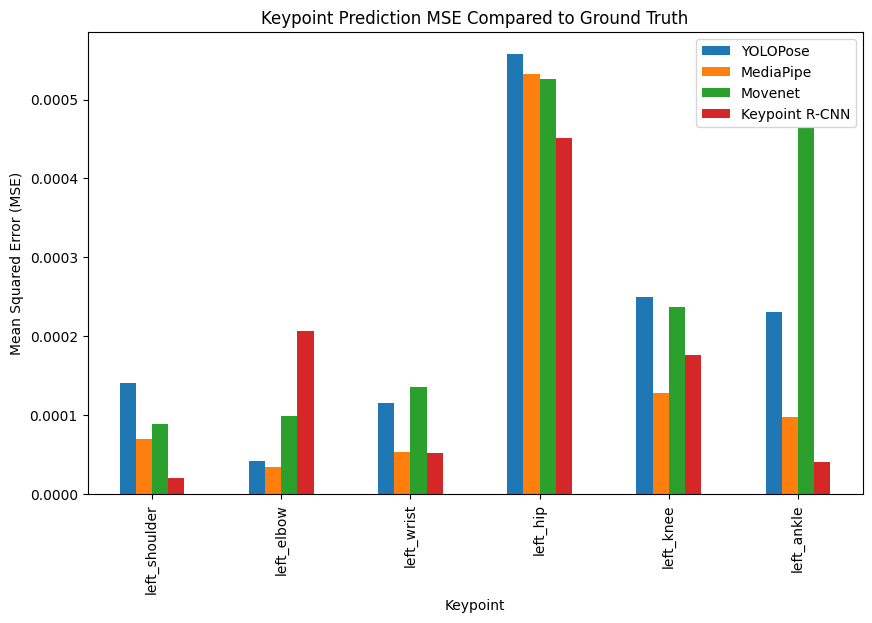

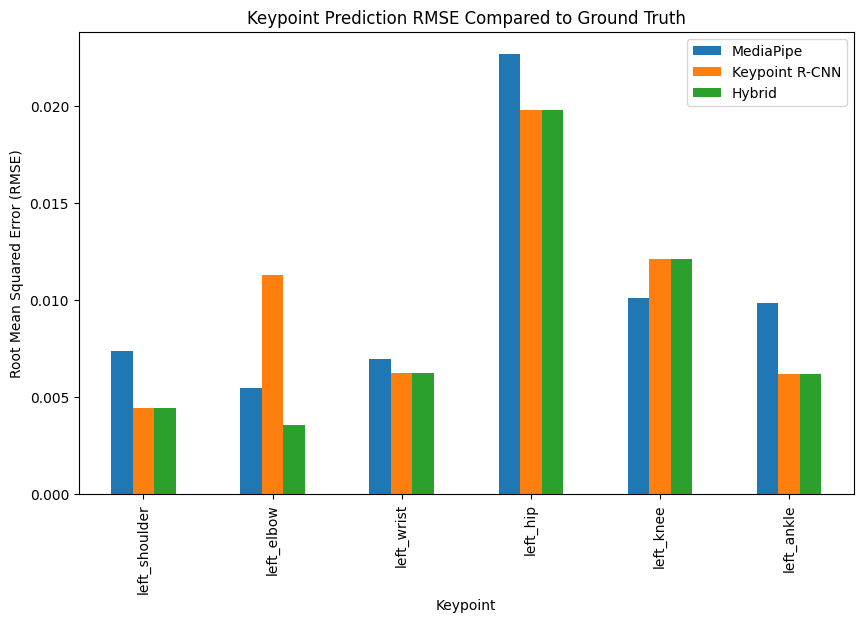

In [20]:
# Plot MSE comparison
mse_df.set_index("Keypoint").plot(kind="bar", figsize=(10, 6))
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Keypoint Prediction MSE Compared to Ground Truth")
plt.show()

# Plot RMSE comparison
rmse_df.set_index("Keypoint").plot(kind="bar", figsize=(10, 6))
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Keypoint Prediction RMSE Compared to Ground Truth")
plt.show()


In [ ]:
# Compute overall MSE and RMSE across all keypoints
overall_mse = {
    "YOLOPose": np.mean(list(yolopose_mse.values())),
    "MediaPipe": np.mean(list(mediapipe_mse.values())),
    "Movenet": np.mean(list(movenet_mse.values())),
    "Keypoint R-CNN": np.mean(list(keypoint_rcnn_mse.values())),
    #"Hybrid": np.mean(list(hybrid_mse.values()))
}

overall_rmse = {
    "YOLOPose": np.mean(list(yolopose_rmse.values())),
    "MediaPipe": np.mean(list(mediapipe_rmse.values())),
    "Movenet": np.mean(list(movenet_rmse.values())),
    "Keypoint R-CNN": np.mean(list(keypoint_rcnn_rmse.values())),
    #"Hybrid": np.mean(list(hybrid_rmse.values()))
}

print("Overall MSE:", overall_mse)
print("Overall RMSE:", overall_rmse)


Overall MSE: {'YOLOPose': 0.00022271707900000008, 'MediaPipe': 0.00015251813766666665, 'Movenet': 0.000258219424, 'Keypoint R-CNN': 0.00015768857500000007}
Overall RMSE: {'YOLOPose': 0.013418357771930005, 'MediaPipe': 0.010396789927996797, 'Movenet': 0.014694242165736717, 'Keypoint R-CNN': 0.010004653722877484}


In [ ]:
# Convert errors to percentage
overall_mse_percentage = {key: value * 100 for key, value in overall_mse.items()}
overall_rmse_percentage = {key: value * 100 for key, value in overall_rmse.items()}

print("Overall MSE in percentage:", overall_mse_percentage)
print("Overall RMSE in percentage:", overall_rmse_percentage)


Overall MSE in percentage: {'YOLOPose': 0.022271707900000007, 'MediaPipe': 0.015251813766666665, 'Movenet': 0.0258219424, 'Keypoint R-CNN': 0.015768857500000007}
Overall RMSE in percentage: {'YOLOPose': 1.3418357771930005, 'MediaPipe': 1.0396789927996797, 'Movenet': 1.4694242165736717, 'Keypoint R-CNN': 1.0004653722877483}


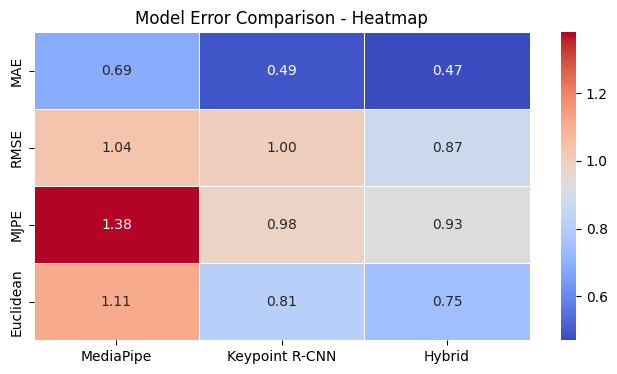

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame without PCK Error
df = pd.DataFrame({
    "MediaPipe": [0.69, 1.04, 1.38, 1.11],
    "Keypoint R-CNN": [0.49, 1, 0.98, 0.81],
    "Hybrid": [0.47, 0.87, 0.93, 0.75]
}, index=["MAE", "RMSE", "MJPE", "Euclidean"])

# Plot heatmap with "coolwarm" colormap
plt.figure(figsize=(8, 4))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Model Error Comparison - Heatmap")
plt.show()


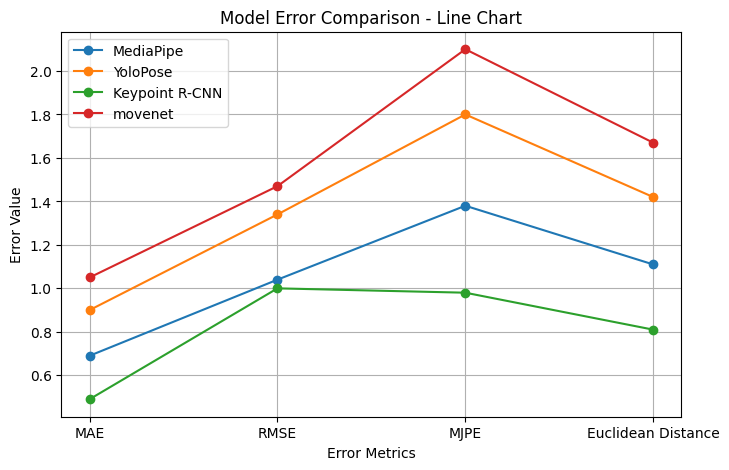

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define models and error metrics
errors = ["MAE", "RMSE", "MJPE", "Euclidean Distance"]
models = ["MediaPipe", "YoloPose", "Keypoint R-CNN","movenet"]
values = np.array([
    [0.69, 1.04, 1.38, 1.11],  # Model A
    [0.9, 1.34, 1.8, 1.42],  # Model B
    [0.49,1,0.98, 0.81],
    [ 1.05, 1.47, 2.1, 1.67 ]   # Model C
])

# Line chart setup
plt.figure(figsize=(8, 5))
for i, model in enumerate(models):
    plt.plot(errors, values[i], marker="o", label=model)

plt.xlabel("Error Metrics")
plt.ylabel("Error Value")
plt.title("Model Error Comparison - Line Chart")
plt.legend()
plt.grid()
plt.show()
